### Bankruptcy Prediction Project ###
Objective
This project aims to predict company bankruptcy using financial metrics from a dataset of 95 features. The target variable, Bankrupt?, is binary (0 = non-bankrupt, 1 = bankrupt). The dataset is likely imbalanced, as bankruptcies are rare. We will preprocess the data, handle imbalance, apply multiple machine learning models, and evaluate their performance to identify the best predictor.

Dataset

The dataset contains 6,819 rows and 95 financial features, such as ROA, operating margins, and debt ratios, sourced from a financial database (e.g., Taiwan Economic Journal). The features capture various aspects of company performance, and the goal is to use these to predict bankruptcy accurately.

Approach
Exploratory Data Analysis (EDA): Understand feature distributions and correlations.
Preprocessing: Handle missing values, outliers, and scale features.
Imbalance Handling: Use SMOTE to balance the dataset.
Modeling: Test KNN, SVM, Logistic Regression, and Naive bayes 
Evaluation: Use accuracy, precision, recall, F1-score and confusion matrices with cross-validation.
Conclusion: Summarize findings and recommend the best model.


### Data Preprcessing and Data Cleaning ###

Import necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

Load the dataset and see basic informations

In [6]:
df = pd.read_csv(r"C:\Users\LENOVO\OneDrive\Desktop\data1.csv")

In [7]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

Exploratory Data Analysis (EDA)

EDA helps understand the dataset's structure, distributions, and relationships. We perform the following

Check Dataset Shape and Info and Statistics

In [10]:
df.shape

(24000, 96)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 24000 non-null  int64  
 1    ROA(C) before interest and depreciation before interest  24000 non-null  float64
 2    ROA(A) before interest and % after tax                   24000 non-null  float64
 3    ROA(B) before interest and depreciation after tax        24000 non-null  float64
 4    Operating Gross Margin                                   24000 non-null  float64
 5    Realized Sales Gross Margin                              24000 non-null  float64
 6    Operating Profit Rate                                    24000 non-null  float64
 7    Pre-tax net Interest Rate                                24000 non-null  float64
 8    After-tax net I

In [12]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,24000.000000,24000.000000,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,2.400000e+04,2.400000e+04,24000.000000,2.400000e+04,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.0,24000.000000
mean,0.034625,0.503994,0.557528,0.552458,0.607879,0.607860,0.998762,0.797192,0.80908

Check for Missing Values

In [14]:
df.isnull().sum().sum()

0

Remove duplicate rows

In [16]:
df.duplicated().sum()

17181

In [17]:
df = df.drop_duplicates()

In [18]:
df.shape

(6819, 96)

Class distribution (to check imbalance)

Visualize the distribution of the target variable to confirm class imbalance.

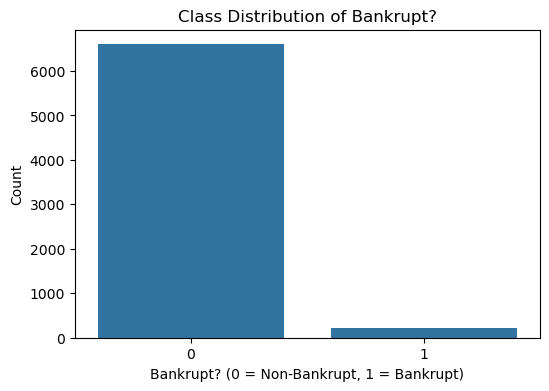


Class Distribution:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


In [20]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Bankrupt?', data=df)
plt.title('Class Distribution of Bankrupt?')
plt.xlabel('Bankrupt? (0 = Non-Bankrupt, 1 = Bankrupt)')
plt.ylabel('Count')
plt.show()
print("\nClass Distribution:")
print(df['Bankrupt?'].value_counts(normalize=True))

Correlation Analysis

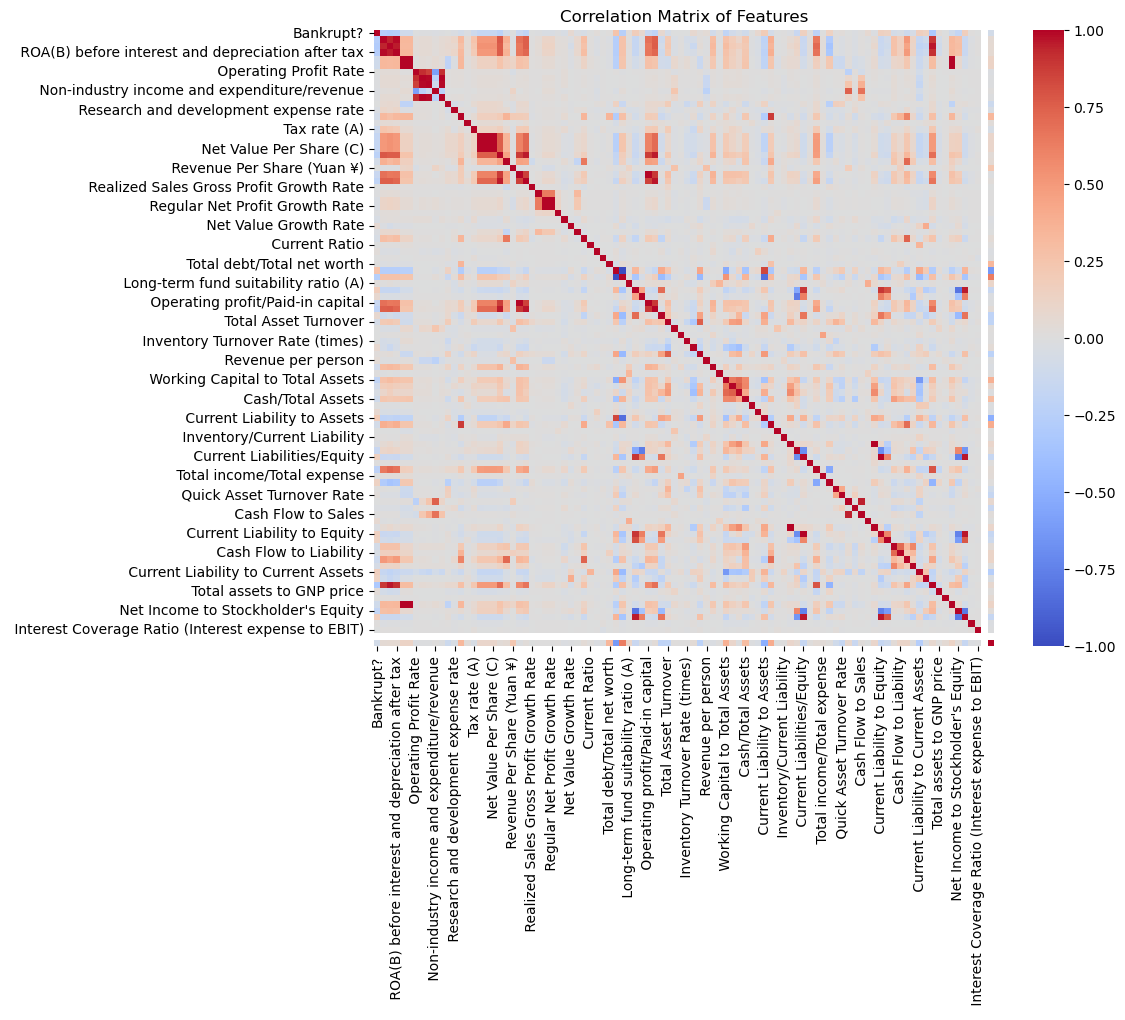


Highly Correlated Features (|corr| > 0.8):
                                               level_0  \
2     ROA(C) before interest and depreciation befor...   
3     ROA(C) before interest and depreciation befor...   
4     ROA(C) before interest and depreciation befor...   
5               ROA(A) before interest and % after tax   
7               ROA(A) before interest and % after tax   
..                                                 ...   
170                              Gross Profit to Sales   
172                 Net Income to Stockholder's Equity   
174                                Liability to Equity   
175                                Liability to Equity   
176                                Liability to Equity   

                                               level_1         0  
2               ROA(A) before interest and % after tax  0.940124  
3     ROA(B) before interest and depreciation after...  0.986849  
4                           Net Income to Total Assets  0.

In [22]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

# Identify highly correlated features
high_corr = corr_matrix[abs(corr_matrix) > 0.8].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
print("\nHighly Correlated Features (|corr| > 0.8):")
print(high_corr)

Remove outliers from each column (except the target column 'Bankrupt?')

In [24]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

Feature Scaling

Scale features using StandardScaler to ensure all features contribute equally to the model.

In [26]:
# Separate features and target
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Train-Test Split

Split the resampled dataset into training and testing sets.

In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

NameError: name 'X_resampled' is not defined

Handle Class Imbalance with SMOTE

Apply SMOTE to oversample the minority class (bankrupt) to balance the dataset.

SMOTE generates synthetic samples for the minority class, balancing the dataset. This improves model performance on the minority class, which is critical for bankruptcy prediction.

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("Resampled Dataset Shape:", X_resampled.shape)
print("Resampled Class Distribution:")
print(pd.Series(y_resampled).value_counts(normalize=True))

Feature Selection

Reduce dimensionality by selecting the most important features using Random Forest.

In [ ]:
importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
top_features = importances['Feature'].head(20).values


### MACHINE LEARNING MODELS ###

### LOGESTIC REGRESSION ###

In [ ]:
X_train_lr = X_train[top_features]
X_test_lr = X_test[top_features]
print("Logistic Regression Selected Features Shape:", X_train_lr.shape)

Initialize the Logistic Regression model

In [ ]:
lr = LogisticRegression(random_state=42)

Define parameter grid for GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Perform GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_lr, y_train)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

In [ ]:
lr = grid_search.best_estimator_
print("Best Logistic Regression Parameters:", grid_search.best_params_)

In [ ]:
LogisticRegression(C=1,solver='lbfgs')

Train the model on the training data

In [ ]:
lr.fit(X_train_lr, y_train)

Use the trained model to make predictions on the test data

In [ ]:
y_pred_lr = lr.predict(X_test_lr)
y_pred_proba_lr = lr.predict_proba(X_test_lr)[:, 1]

Calculate various performance metrics

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

Cross-validation score

In [ ]:
cv_scores_lr = cross_val_score(lr, X_train_lr, y_train, cv=5, scoring='f1')

Print the results

In [ ]:
print("\nLogistic Regression Model Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")
print(f"Cross-Validation F1-Score (Mean): {cv_scores_lr.mean():.4f} (± {cv_scores_lr.std():.4f})")

Print detailed classification report (precision, recall, f1-score for each class)

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_train, lr.predict(X_train_lr)))
print(classification_report(y_test, y_pred_lr))

Confusion Matrix 

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### DECISION TREE ###

In [ ]:
model = DecisionTreeClassifier(random_state=42)

Train the model on the training data

In [ ]:
model.fit(X_train, y_train)

Use the trained model to make predictions on the test data

In [ ]:
y_pred = model.predict(X_test)

Calculate various performance metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Print the results

In [ ]:
print("Decision Tree Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Print detailed classification report (precision, recall, f1-score for each class)

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)

### Naive Bayes ###

Feature Selection

In [ ]:
X_train_nb = X_train[top_features]
X_test_nb = X_test[top_features]
print("Naive Bayes Selected Features Shape:", X_train_nb.shape)

Initialize the Naive Bayes model

In [ ]:
nb = GaussianNB()

Train the model on the training data

In [ ]:
nb.fit(X_train_nb, y_train)

Use the trained model to make predictions on the test data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred_nb = nb.predict(X_test_nb)
y_pred_proba_nb = nb.predict_proba(X_test_nb)[:, 1]

Calculate various performance metrics

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

In [ ]:
cv_scores_nb = cross_val_score(nb, X_train_nb, y_train, cv=5, scoring='f1')

Print the results

In [ ]:
print("\nNaive Bayes Model Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")
print(f"ROC-AUC: {roc_auc_nb:.4f}")
print(f"Cross-Validation F1-Score (Mean): {cv_scores_nb.mean():.4f} (± {cv_scores_nb.std():.4f})")

Print detailed classification report (precision, recall, f1-score for each class)

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_nb))

Confusion matrix

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot()
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### K-Nearest Neighbors ###

Feature Selection

In [ ]:
X_train_knn = X_train[top_features]
X_test_knn = X_test[top_features]
print("KNN Selected Features Shape:", X_train_knn.shape)

Initialize the K-Nearest Neighbors model

In [ ]:
knn = KNeighborsClassifier()

Define parameter grid for GridSearchCV

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

Perform GridSearchCV

In [ ]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_knn, y_train)

Best model

In [ ]:
knn = grid_search.best_estimator_
print("Best KNN Parameters:", grid_search.best_params_)

Train the model on the training data

In [ ]:
knn.fit(X_train_knn, y_train)

Use the trained model to make predictions on the test data

In [ ]:
y_pred_knn = knn.predict(X_test_knn)
y_pred_proba_knn = knn.predict_proba(X_test_knn)[:, 1]

Calculate various performance metrics

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)


In [ ]:
cv_scores_knn = cross_val_score(knn, X_train_knn, y_train, cv=5, scoring='f1')


Print the results

In [ ]:
print("\nK-Nearest Neighbors Model Metrics:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"ROC-AUC: {roc_auc_knn:.4f}")
print(f"Cross-Validation F1-Score (Mean): {cv_scores_knn.mean():.4f} (± {cv_scores_knn.std():.4f})")

Print detailed classification report (precision, recall, f1-score for each class)

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_knn))

Confusion matrix

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()

### Support Vector Machine ###

In [ ]:
import pandas as pd

# Convert NumPy arrays to DataFrames with proper column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Now use string-based column selection
X_train_svm = X_train_df[top_features]
X_test_svm = X_test_df[top_features]

print("SVM Selected Features Shape:", X_train_svm.shape)


Initialize the Support Vector Machine model

In [ ]:
model = SVC(random_state=42)

Train the model on the training data

In [ ]:
model.fit(X_train, y_train)

Use the trained model to make predictions on the test data

In [ ]:
y_pred = model.predict(X_test)

Calculate various performance metrics

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Print the results

In [ ]:
print("Support Vector Machine Model Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Print detailed classification report (precision, recall, f1-score for each class)

In [ ]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

Confusion matrix

In [ ]:
confusion_matrix(y_test, y_pred)